Import libraries:

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import gzip
from os.path import *
from os import listdir

## Split Single Image into 4

In [36]:
DIR ='/Volumes/GoogleDrive/My Drive/PlanetScope Imagery/Quads/' # G Drive folder location

In [37]:
# Read the image
raster = rasterio.open(DIR+'Cat_RGB'+'/'+'796-974.tiff')
height, width = raster.shape

# Convert to numpy arrays
red = raster.read(3)
green = raster.read(2)
blue = raster.read(1)

rgb = np.dstack((red, green, blue))
        
# Cut the image in half (width)
width_cutoff = width // 2
rgb_s1 = rgb[:, :width_cutoff]
rgb_s2 = rgb[:, width_cutoff:]

# Cut the image in half (height)
height_cutoff = height // 2
top_left = rgb_s1[:height_cutoff, :]
bottom_left = rgb_s1[height_cutoff:, :]
top_right = rgb_s2[:height_cutoff, :]
bottom_right = rgb_s2[height_cutoff:, :]

f = gzip.GzipFile(DIR+'Cat_RGB'+'/'+"top_left.npy.gz", "w")
np.save(file=f, arr=top_left)
f.close()

f = gzip.GzipFile(DIR+'Cat_RGB'+'/'+"top_right.npy.gz", "w")
np.save(file=f, arr=top_right)
f.close()

f = gzip.GzipFile(DIR+'Cat_RGB'+'/'+"bottom_left.npy.gz", "w")
np.save(file=f, arr=bottom_left)
f.close()

f = gzip.GzipFile(DIR+'Cat_RGB'+'/'+"bottom_right.npy.gz", "w")
np.save(file=f, arr=bottom_right)
f.close()


#np.save(DIR+'AmaQuad1_1'+'/'+"First_Half", s1)
#np.save(DIR+'AmaQuad1_1'+'/'+"Second_Half", s2)

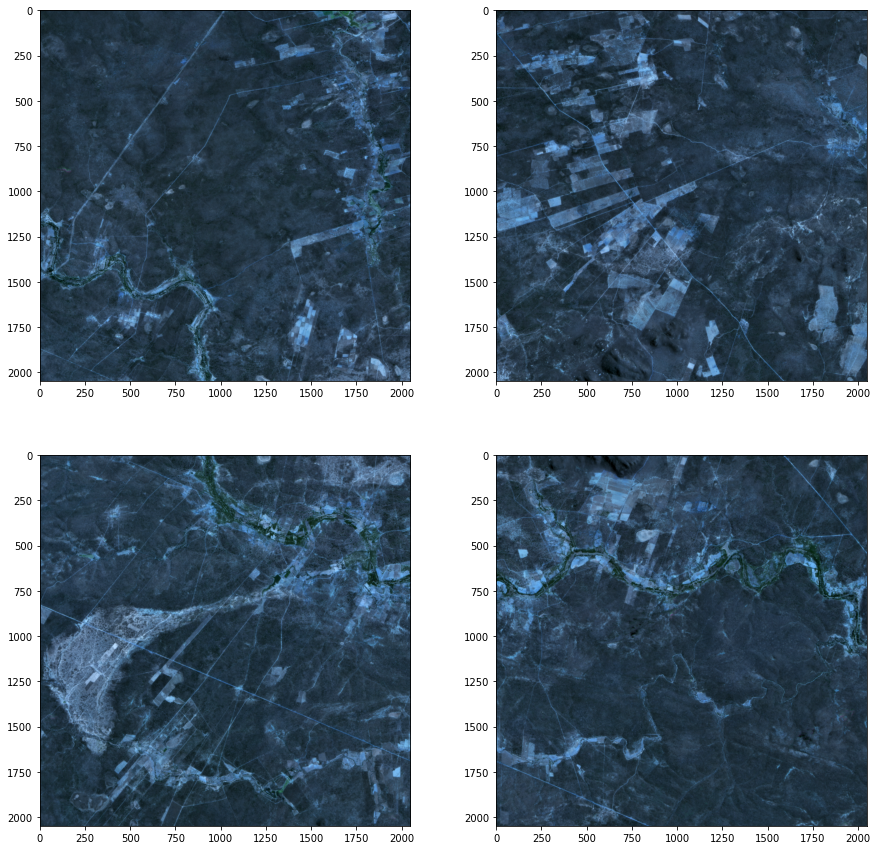

In [32]:
#s1 = np.load(DIR+'AmaQuad1_1'+'/'+"First_Half.npy")
#s2 = np.load(DIR+'AmaQuad1_1'+'/'+"Second_Half.npy")

fig, axarr = plt.subplots(2,2, figsize=(15,15))

f = gzip.GzipFile(DIR+'Cat_RGB'+'/'+"top_left.npy.gz", "r"); 
s1 = np.load(f)

f = gzip.GzipFile(DIR+'Cat_RGB'+'/'+"top_right.npy.gz", "r"); 
s2 = np.load(f)

f = gzip.GzipFile(DIR+'Cat_RGB'+'/'+"bottom_left.npy.gz", "r"); 
s3 = np.load(f)

f = gzip.GzipFile(DIR+'Cat_RGB'+'/'+"bottom_right.npy.gz", "r"); 
s4 = np.load(f)

axarr[0][0].imshow(s1)
axarr[0][1].imshow(s2)
axarr[1][0].imshow(s3)
axarr[1][1].imshow(s4)

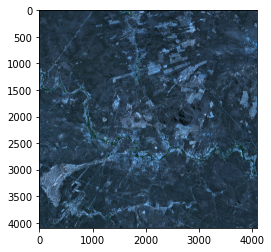

In [33]:
matplotlib.pyplot.imshow(rgb)
plt.show()

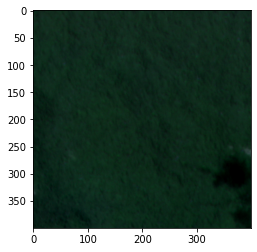

(400, 400, 3)


In [68]:
f = gzip.GzipFile(DIR+'Ama_RGB'+'/'+"659-1046-tr.npy.gz", "r"); 
s4 = np.load(f)

s5 = rgb[:400, :400]
130
matplotlib.pyplot.imshow(s5)
plt.show()

f = gzip.GzipFile(DIR+'Ama_RGB'+'/'+"400x400.npy.gz", "w")
np.save(file=f, arr=s5)
f.close()


print (s5.shape)

## Split Multiple Images into 4

In [57]:
bbox_name = 'Ama_RGB'

Split the images and save each quadrant as a compressed numpy array

In [58]:
print ("Running...")

# Get the list of all quads in the directory they have been downloaded from:
tiff_files = [f for f in listdir(DIR+bbox_name) if isfile(join(DIR+bbox_name, f))]
cur_tiff = 0

# Generate scale for ScaleBar to add to each image
for row in range(0,3):
    for i in range(0,3):
            
        tiff = tiff_files[cur_tiff]
        print ("STARTING: " + str(DIR+bbox_name+'/'+tiff))
        cur_tiff += 1
        
        # Generate Image
        cur_plot = 0
        # Open the file:
        raster = rasterio.open(DIR+bbox_name+'/'+tiff)
    
        # Read the image
        raster = rasterio.open(DIR+bbox_name+'/'+tiff)
        height, width = raster.shape

        # Convert to numpy arrays
        red = raster.read(3)
        green = raster.read(2)
        blue = raster.read(1)

        rgb = np.dstack((red, green, blue))

        # Cut the image in half
        width_cutoff = width // 2
        rgb_s1 = rgb[:, :width_cutoff]
        rgb_s2 = rgb[:, width_cutoff:]
        
        # Cut the image in half (height)
        height_cutoff = height // 2
        top_left = rgb_s1[:height_cutoff, :]
        bottom_left = rgb_s1[height_cutoff:, :]
        top_right = rgb_s2[:height_cutoff, :]
        bottom_right = rgb_s2[height_cutoff:, :]
        
        tiff_id = tiff.split('.')[0]
        
        f = gzip.GzipFile(DIR+bbox_name+'/'+tiff_id+"-tl.npy.gz", "w")
        np.save(file=f, arr=top_left)
        f.close()

        f = gzip.GzipFile(DIR+bbox_name+'/'+tiff_id+"-tr.npy.gz", "w")
        np.save(file=f, arr=top_right)
        f.close()

        f = gzip.GzipFile(DIR+bbox_name+'/'+tiff_id+"-bl.npy.gz", "w")
        np.save(file=f, arr=bottom_left)
        f.close()

        f = gzip.GzipFile(DIR+bbox_name+'/'+tiff_id+"-br.npy.gz", "w")
        np.save(file=f, arr=bottom_right)
        f.close()
        
        print ("FINISHED")
        


Running...
STARTING: /Volumes/GoogleDrive/My Drive/PlanetScope Imagery/Quads/Ama_RGB/659-1046.tiff
FINISHED
STARTING: /Volumes/GoogleDrive/My Drive/PlanetScope Imagery/Quads/Ama_RGB/660-1046.tiff
FINISHED
STARTING: /Volumes/GoogleDrive/My Drive/PlanetScope Imagery/Quads/Ama_RGB/661-1046.tiff
FINISHED
STARTING: /Volumes/GoogleDrive/My Drive/PlanetScope Imagery/Quads/Ama_RGB/662-1046.tiff
FINISHED
STARTING: /Volumes/GoogleDrive/My Drive/PlanetScope Imagery/Quads/Ama_RGB/663-1046.tiff
FINISHED
STARTING: /Volumes/GoogleDrive/My Drive/PlanetScope Imagery/Quads/Ama_RGB/664-1046.tiff
FINISHED
STARTING: /Volumes/GoogleDrive/My Drive/PlanetScope Imagery/Quads/Ama_RGB/665-1046.tiff
FINISHED
STARTING: /Volumes/GoogleDrive/My Drive/PlanetScope Imagery/Quads/Ama_RGB/666-1046.tiff
FINISHED
STARTING: /Volumes/GoogleDrive/My Drive/PlanetScope Imagery/Quads/Ama_RGB/667-1046.tiff
FINISHED


Open 9 top left corners and plot them to compare

Running...
['659-1046-tl.npy.gz', '660-1046-tl.npy.gz', '661-1046-tl.npy.gz', '662-1046-tl.npy.gz', '663-1046-tl.npy.gz', '664-1046-tl.npy.gz', '665-1046-tl.npy.gz', '666-1046-tl.npy.gz', '667-1046-tl.npy.gz']


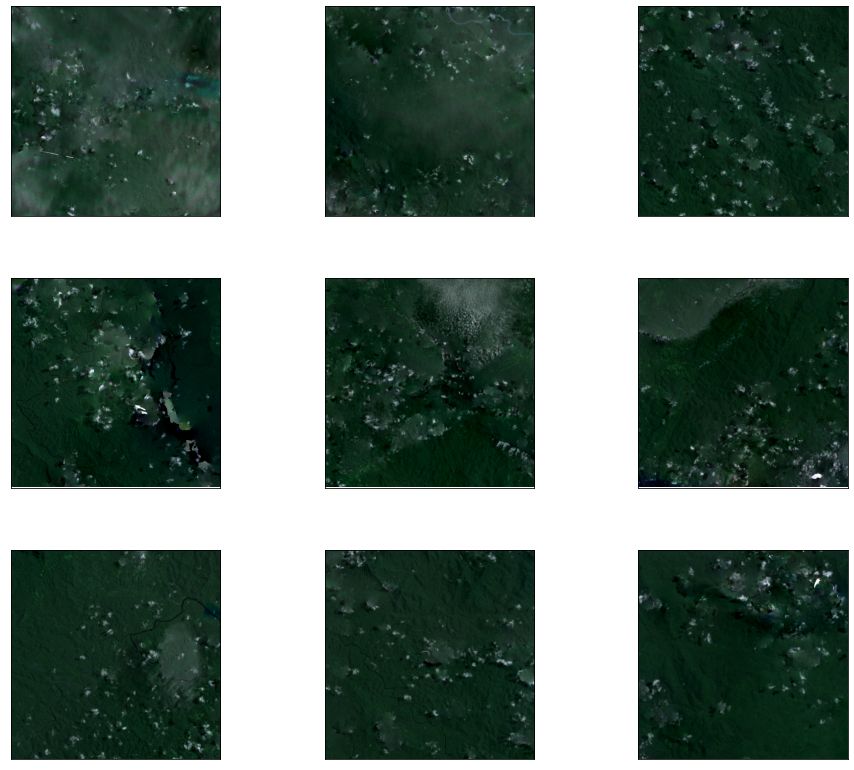

In [59]:
print ("Running...")
import matplotlib.gridspec as gridspec

fig, axarr = plt.subplots(3,3, figsize=(15,15), gridspec_kw = {'wspace':0.5, 'hspace':0})

#gs1 = gridspec.GridSpec(4, 4)
#gs1.update(wspace=0.025, hspace=0.05) # set the spacing between axes. 

#fig.subplots_adjust(wspace=0, hspace=0)
# Get the list of all quads in the directory they have been downloaded from:
tiff_files = [f for f in listdir(DIR+bbox_name) if isfile(join(DIR+bbox_name, f)) and 'tl.npy.gz' in f]
print (tiff_files)
cur_tiff = 0

# Generate scale for ScaleBar to add to each image
for row in range(0,3):
    for i in range(0,3):
        f = gzip.GzipFile(DIR+bbox_name+'/'+tiff_files[cur_tiff], "r"); 
        s2 = np.load(f)
        
        axarr[row][i].set_xticks([])
        axarr[row][i].set_yticks([])
        axarr[row][0].set_ylabel("")
        #axarr[row][i].set_aspect('equal')
        axarr[row][i].imshow(s2)
        cur_tiff += 1
#fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig(DIR+bbox_name+"/"+bbox_name+".pdf", bbox_inches = 'tight', pad_inches = 0)